In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from typing import List

In [2]:
# Generating synthetic data

size = 1000
y_train = np.random.normal(50,5,size*2)
y_train_hat = np.random.normal(45,8,size*2)

y_test = np.random.normal(50,5,size)
y_test_hat = np.random.normal(55,3,size)

In [3]:
def _prepare_df(y_trues: List[List], y_hats: List[List], labels: List):
    df = pd.DataFrame(columns=['label', 'y_hat', 'e'])
    for y_true, y_hat, label in zip(y_trues, y_hats, labels):
        e = y_true - y_hat
        sub_df = pd.DataFrame({'y_hat': y_hat, 'e': e})
        sub_df['label'] = label
        df = df.append(sub_df, ignore_index=True)
    return df


def analyze_residuals(y_trues: List[List], 
                      y_hats: List[List], 
                      labels: List, 
                      axis_label_size=15, 
                      axis_ticks_size=15):
    
    df = _prepare_df(y_trues, y_hats, labels)
    
    g = sns.JointGrid(data=df, x='y_hat', y='e', hue='label', height=7)
    g.plot_joint(sns.scatterplot, s=30, alpha=.5)
    g.plot_marginals(sns.histplot, kde=True)

    g.ax_joint.grid()
    g.ax_joint.axhline(0, ls='--', color='red')
    g.ax_marg_y.axhline(0, ls='--', color='red')
    
    g.ax_joint.set_xticklabels(g.ax_joint.get_xticks(), size=axis_ticks_size)
    g.ax_joint.set_yticklabels(g.ax_joint.get_yticks(), size=axis_ticks_size)
    g.set_axis_labels('Predicted', 'Residual', fontsize=axis_label_size)
    plt.setp(g.ax_joint.get_legend().get_texts(), fontsize=axis_label_size)
    plt.setp(g.ax_joint.get_legend().get_title(), fontsize=0)  
    
    return g

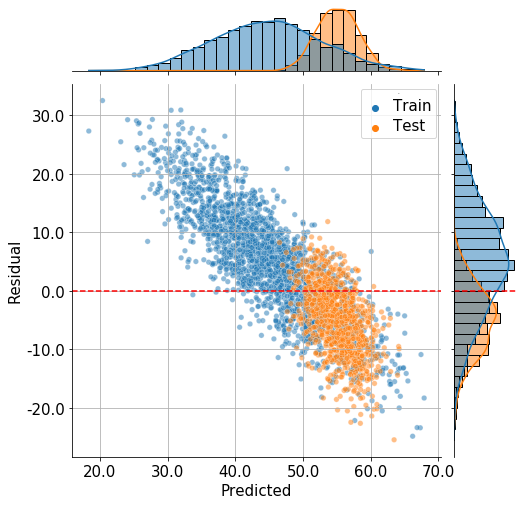

In [4]:
analyze_residuals(y_trues=[y_train, y_test], 
                  y_hats=[y_train_hat, y_test_hat], 
                  labels=['Train', 'Test']);